# The Train-Test Split

What if we wish to know how well petal width can be predicted for unseen data?

![](https://www.evernote.com/l/AAHQ-HpXuRpBLIT8zgObrCA0QHgFOti7PswB/image.png)

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression

In [2]:
%pwd

'/home/suzyq76/uclax-data-science/01-iris-03-why-estimate-f'

In [3]:
%cd 01-iris-03-why-estimate-f/

[Errno 2] No such file or directory: '01-iris-03-why-estimate-f/'
/home/suzyq76/uclax-data-science/01-iris-03-why-estimate-f


In [4]:
%ls

04-why-estimate-f-prediction.ipynb  06-multicollinearity.ipynb         data/
05-the-train-test-split.ipynb       07-why-estimate-f-inference.ipynb


### Make sure to update the file location below

In [5]:
IRIS_DATA_LOCATION = 'data/iris.csv'

In [6]:
iris_df = pd.read_csv(IRIS_DATA_LOCATION, index_col=0)

## Overfitting and Underfitting

When fitting a model for making predictions, a model is only as good as its ability to work on unseen data. A model that does not learn the underlying patterns in the data is said to be **underfit**. A model that learns that underlying patterns in the data too well is said to be **overfit**.

## Learning Too Well is a Problem!?

It may seem odd to think of a model that has learned to well as being bad in some way, but recall that we are looking to make predictions with new input data. A model that is overfit will have learned the patterns in its **training** data, but will also have learned the noise inherent to this data. New input data will have completely different noise *by definition*. A model that is overfit will be poor at generalization and will not perform well on data it has never seen.

# The Train-Test Split

Of course, we will not have access to the new data we will use at the time of fitting the model. We will have to simulate new data in some way. We do this, by creating **test** data using some fraction of the original data we started with.


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
target, features = dmatrices("petal_width ~ petal_length", iris_df)

Of course, we will not have access to the new data we will use at the time of fitting the model. We will have to simulate new data in some way. We do this, by creating **test** data using some fraction of the original data we started with.

In [9]:
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, target, random_state=42) 

In [10]:
(features_train.shape,
 target_train.shape,
 features_test.shape,
 target_test.shape)

((112, 2), (112, 1), (38, 2), (38, 1))

In [11]:
features_test[:5]

array([[ 1. ,  4.7],
       [ 1. ,  1.7],
       [ 1. ,  6.9],
       [ 1. ,  4.5],
       [ 1. ,  4.8]])

In [12]:
linear_regression_model = LinearRegression(fit_intercept=False)

linear_regression_model.fit(features_train, target_train)

petal_width_prediction_1_var = (linear_regression_model
                                .predict(features_test))

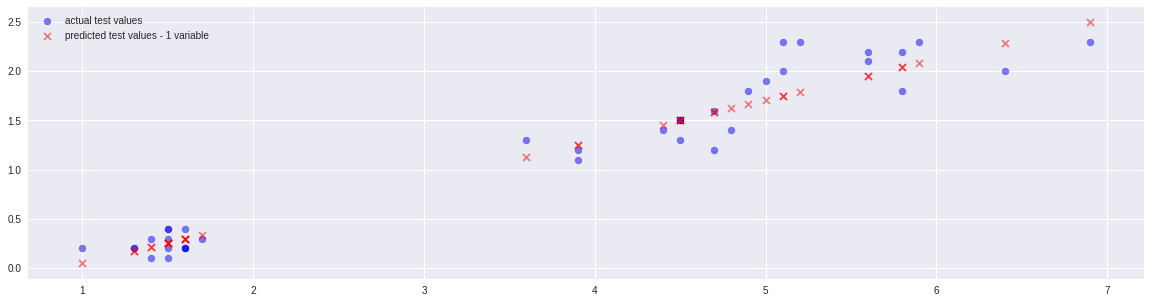

In [13]:
plt.figure(1, (20,5))

plt.scatter(features_test[:, 1], target_test, 
            marker='o', color='blue', alpha=0.5, 
            label='actual test values')
plt.scatter(features_test[:, 1], petal_width_prediction_1_var,
            marker='x', color='red', alpha=0.5, 
            label='predicted test values - 1 variable')
plt.legend()

In [14]:
%pwd

'/home/suzyq76/uclax-data-science/01-iris-03-why-estimate-f'

In [15]:
np.save('data/petal_width_prediction_1_var', petal_width_prediction_1_var)

### Explain why we use the train-test split in the context of overfitting and underfitting.

The train-test split is used like a calibration for our test data, we want to ensure that our model is not overfit or is so complicated that it won't be sufficient for new data. We also want to ensure that our model wasn't under trained so that is isn't close enough to future data.